In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#checking the data
print(f"Training sample: \n{train_data[0]}")
print(f"Training label: \n{train_labels[0]}")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

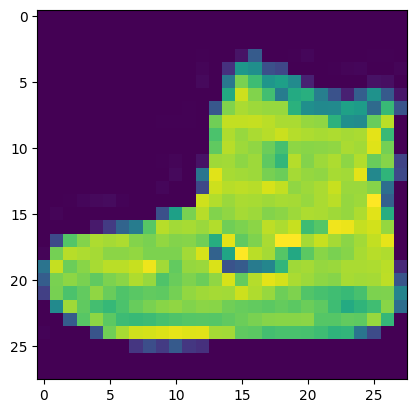

In [ ]:
#plot a sample training image
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
#creating names of the labels as per data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

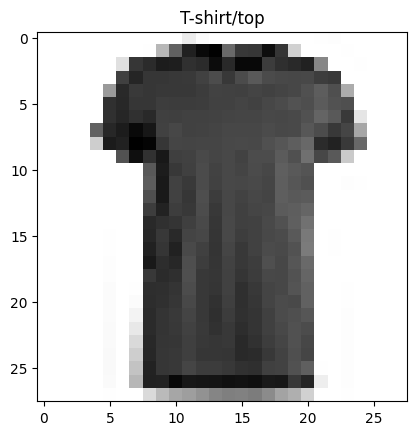

In [ ]:
#plot another example
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]]);

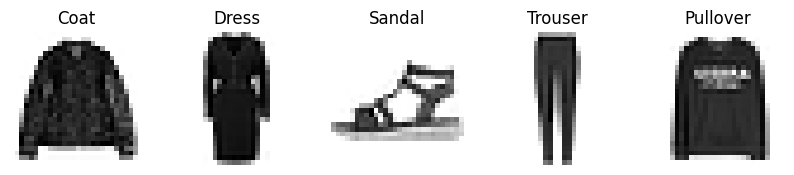

In [ ]:
#plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(10,10))
for i in range(5):
    ax = plt.subplot(5,5,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [ ]:
tf.random.set_seed(42)

#build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#we are taking 28 by 28 pixel images and flattening them to 784 neurons
    tf.keras.layers.Dense(14, activation="relu"),
    tf.keras.layers.Dense(14, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")#there are 10 output classes, hence output shape
])

#compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#fit the model(we didn't normalise the data yet, let's check for the results)
non_norm_history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1923 - loss: 4.0474 - val_accuracy: 0.3229 - val_loss: 1.6419
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3349 - loss: 1.6176 - val_accuracy: 0.3517 - val_loss: 1.5386
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3563 - loss: 1.5245 - val_accuracy: 0.3703 - val_loss: 1.4681
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3627 - loss: 1.4920 - val_accuracy: 0.3712 - val_loss: 1.4621
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4142 - loss: 1.3894 - val_accuracy: 0.4421 - val_loss: 1.2966
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4557 - loss: 1.2631 - val_accuracy: 0.4016 - val_loss: 1.4038
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4508 - loss: 1.2649 - val_accuracy: 0.4596 - val_loss: 1.2313
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.4605 - loss: 1.2449 - 

In [ ]:
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

In [ ]:
#let's normalize the data and train
train_data = train_data/255.0
test_data = test_data/255.0

train_data.min(), train_data.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
tf.random.set_seed(42)

#build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(14, activation="relu"),
    tf.keras.layers.Dense(14, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#fit the normalized data
norm_history=model_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6510 - loss: 0.9797 - val_accuracy: 0.8200 - val_loss: 0.5131
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8355 - loss: 0.4685 - val_accuracy: 0.8324 - val_loss: 0.4787
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8495 - loss: 0.4267 - val_accuracy: 0.8384 - val_loss: 0.4585
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8562 - loss: 0.4042 - val_accuracy: 0.8445 - val_loss: 0.4461
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8603 - loss: 0.3895 - val_accuracy: 0.8458 - val_loss: 0.4424
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8637 - loss: 0.3784 - val_accuracy: 0.8487 - val_loss: 0.4349
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8661 - loss: 0.3697 - val_accuracy: 0.8503 - val_loss: 0.4262
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8686 - loss: 0.3619 -

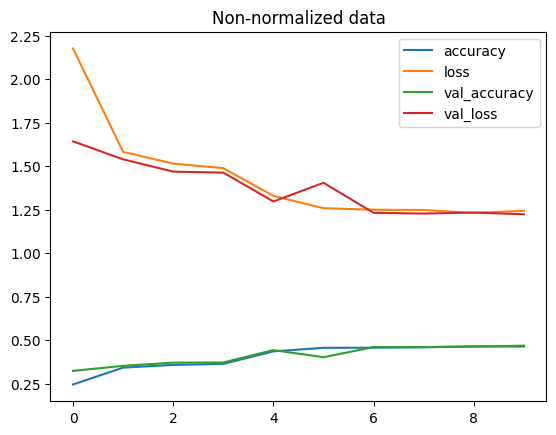

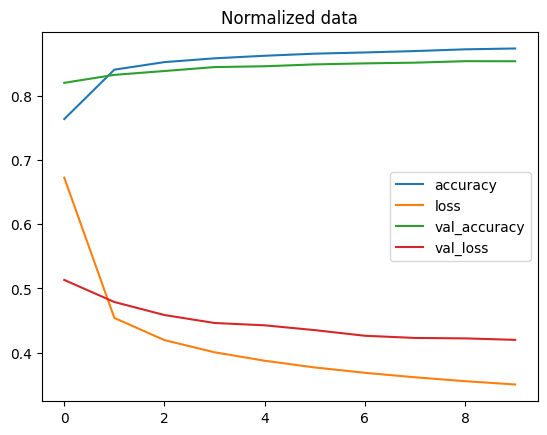

In [ ]:
import pandas as pd
#plot non-normalised data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data");
#plot normalised data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [ ]:
#creating the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#fit the model
find_lr_history = model_1.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels), callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8751 - loss: 0.3451 - val_accuracy: 0.8571 - val_loss: 0.4121 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8764 - loss: 0.3425 - val_accuracy: 0.8544 - val_loss: 0.4169 - learning_rate: 0.0011
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8760 - loss: 0.3410 - val_accuracy: 0.8533 - val_loss: 0.4174 - learning_rate: 0.0013
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8768 - loss: 0.3405 - val_accuracy: 0.8529 - val_loss: 0.4140 - learning_rate: 0.0014
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8763 - loss: 0.3396 - val_accuracy: 0.8515 - val_loss: 0.4194 - learning_rate: 0.0016
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8758 - loss: 0.3396 - val_accuracy: 0.8526 - val_loss: 0.4195 - learning_rate: 0.0018
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8750 - 

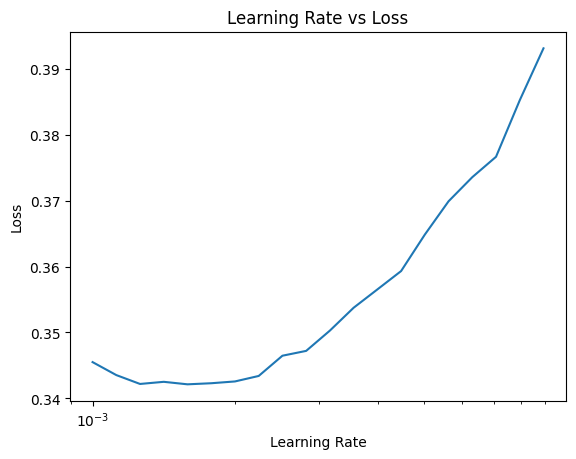

In [ ]:
#plot the learning rate decay curve
import numpy as np
lrs = 1e-3 * (10**(np.arange(20)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

from the above graph, it turns out that the ideal learning rate is about the same as default one, which is 0.001

In [ ]:
#make predictions
y_probs=model_1.predict(test_data)
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.5194713e-05, 2.4631727e-04, 1.4882391e-04, 5.2930103e-05,
        9.2444672e-05, 3.1019518e-02, 2.9577825e-03, 2.5802668e-02,
        5.6067831e-04, 9.3908358e-01],
       [6.9786205e-05, 3.0121427e-07, 9.9812669e-01, 2.0478359e-07,
        1.5261204e-03, 9.9494862e-16, 2.7684707e-04, 0.0000000e+00,
        3.5532679e-08, 3.8913019e-22],
       [6.0952483e-09, 9.9999994e-01, 3.9036122e-11, 3.9626752e-10,
        1.7191365e-08, 3.2472180e-31, 1.0159750e-10, 0.0000000e+00,
        3.2122668e-15, 2.1087078e-36],
       [3.0366154e-09, 9.9999982e-01, 1.6386553e-10, 2.2449098e-09,
        5.7637614e-08, 6.1680616e-24, 5.8763822e-10, 6.2745311e-36,
        1.5092589e-12, 1.2070742e-27],
       [1.8607458e-02, 1.9451188e-06, 1.1946475e-02, 3.3425409e-03,
        9.3416125e-03, 2.5737001e-10, 9.5667690e-01, 6.9156589e-21,
        8.3183339e-05, 0.0000000e+00]], dtype=float32)

In [ ]:
#above are the probabilities of each image belonging to the 10 classes. The maximum of these probabilities is where the model puts the image into
y_probs[1].argmax(), class_names[y_probs[1].argmax()]

(np.int64(2), 'Pullover')

In [ ]:
y_probs.shape

(10000, 10)

In [ ]:
y_preds=y_probs.argmax(axis=1)
y_preds[:5]

array([9, 2, 1, 1, 6])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[763,   1,  31,  52,   9,   2, 132,   0,  10,   0],
       [  0, 959,   5,  23,   9,   0,   4,   0,   0,   0],
       [ 10,   5, 843,   8,  92,   0,  40,   1,   1,   0],
       [ 13,  15,  18, 812,  97,   1,  39,   0,   4,   1],
       [  0,   2, 185,   9, 776,   0,  25,   2,   1,   0],
       [  0,   1,   0,   1,   0, 907,   0,  58,   1,  32],
       [102,   3, 215,  28, 153,   0, 488,   0,  11,   0],
       [  0,   0,   0,   0,   0,  16,   0, 962,   0,  22],
       [  1,   1,  13,   2,   5,   8,  22,  12, 936,   0],
       [  0,   0,   0,   0,   0,   5,   1,  67,   1, 926]])

In [ ]:
y_probs.shape

(10000, 10)

In [ ]:
import itertools
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

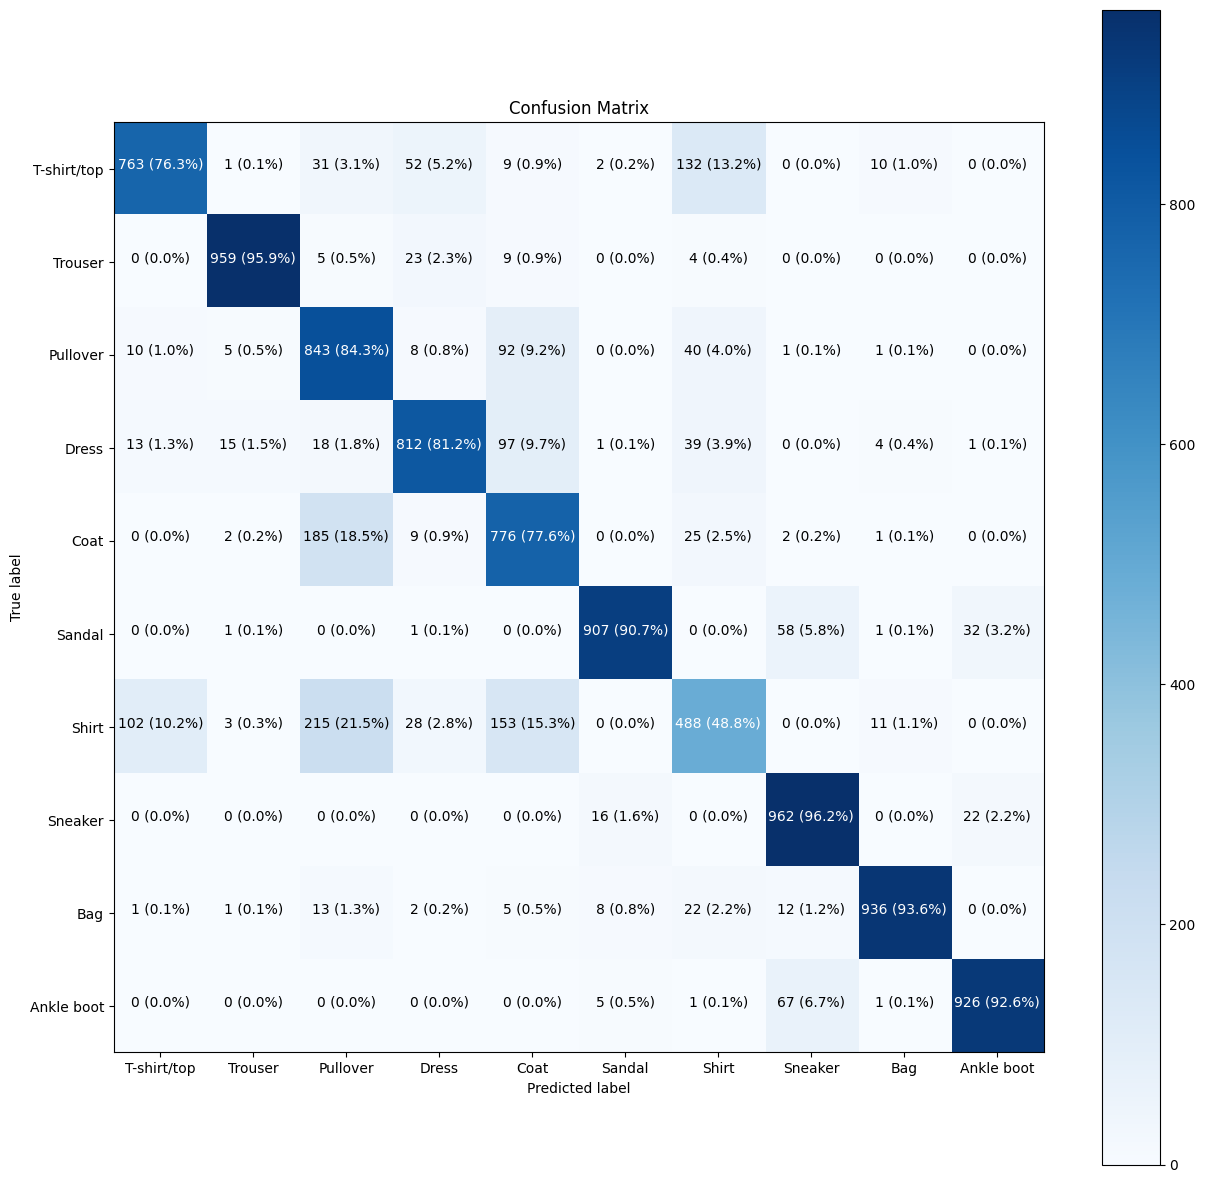

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


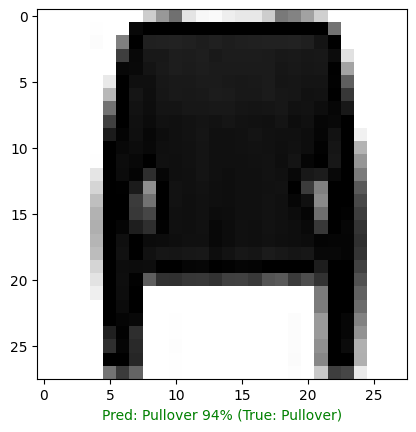

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_1,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)